In [30]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('1.csv', header=None)


In [37]:
# Parameter LPF
cutoff_frequency = 10
sampling_rate = 1000
amplitude = 1.0


In [38]:
def allpass_based_filter(input_signal, cutoff_frequency, sampling_rate, highpass=False, amplitude=1.0):
    # Filter LPF Butterworth
    order = 4
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

    # Terapkan filter pada data input
    filtered_data = signal.filtfilt(b, a, input_signal)

    # Normalisasi dan amplifikasi data
    filtered_data = amplitude * filtered_data

    return filtered_data

In [39]:
# Terapkan LPF pada data
filtered_data = allpass_based_filter(data.iloc[:, 1], cutoff_frequency, sampling_rate, highpass=False, amplitude=amplitude)


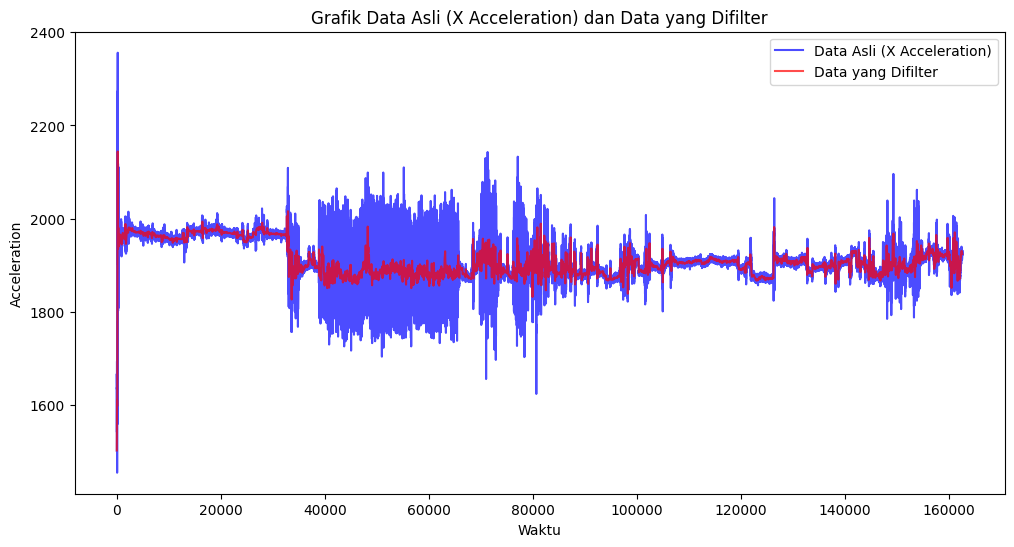

In [40]:
# Visualisasi data asli dan data yang telah difilter
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.iloc[:, 1], label='Data Asli (X Acceleration)', color='b', alpha=0.7)
plt.plot(data.index, filtered_data, label='Data yang Difilter', color='r', alpha=0.7)
plt.xlabel('Waktu')
plt.ylabel('Acceleration')
plt.legend()
plt.title('Grafik Data Asli (X Acceleration) dan Data yang Difilter')
plt.show()